# Hypothesis Testing 

## Synopsis

- Null Hypothesis Significance testing (NHST)
- Proof by contradiction 
- Least important : Only useful in come context
- Methodology 
    - Apparent difference in distribution 
    - Assume no difference 
    - Test Statistics
    - Calculate P-Value 
    - Comment
    
```{note}
We make modelling decisions on 
1. Null Hypothesis 
2. Test Statistic ( Choosing a 1-sided or a 2-sided test)

```

In [37]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
from IPython.display import display, display_html
import bqplot
import first

from bqplot import LinearScale, Hist, Figure, Axis, ColorScale

from bqplot import pyplot as pltbq
# import seaborn as sns
# seed the random number generator so we all get the same results
np.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

mpl.rcParams['figure.figsize'] = (8.0, 9.0)

In [38]:
%matplotlib inline

## Part 1

- Suppose u observe apparent difference between 2 groups 
- Check if it might be due to chance


In [39]:
live, firsts, others = first.MakeFrames()

In [40]:
firsts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4413 entries, 0 to 13588
Columns: 244 entries, caseid to totalwgt_lb
dtypes: float64(171), int64(73)
memory usage: 8.2 MB


In [41]:
firsts.head()

caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0        1         1        NaN        NaN       NaN       NaN       6.0   
2        2         1        NaN        NaN       NaN       NaN       5.0   
5        6         1        NaN        NaN       NaN       NaN       6.0   
8        7         1        NaN        NaN       NaN       NaN       5.0   
10      12         1        NaN        NaN       NaN       NaN       5.0   

    pregend2  nbrnaliv  multbrth  ...  laborfor_i  religion_i  metro_i  \
0        NaN       1.0       NaN  ...           0           0        0   
2        NaN       3.0       5.0  ...           0           0        0   
5        NaN       1.0       NaN  ...           0           0        0   
8        NaN       1.0       NaN  ...           0           0        0   
10       NaN       1.0       NaN  ...           0           0        0   

        basewgt  adj_mod_basewgt      finalwgt  secu_p  sest  cmintvw  \
0   3410.389399      3869.349602   6448.271112       2     9      NaN   
2   7226.301740      8567.549110  12999.542264       2    12      NaN   
5   4870.926435      5325.196999   8874.440799       1    23      NaN   
8   3409.579565      3787.539000   6911.879921       2    14      NaN   
10  3612.781968      4146.013572   6909.331618       1    31      NaN   

    totalwgt_lb  
0        8.8125  
2        9.1250  
5        8.5625  
8        7.5625  
10       7.8125  

[5 rows x 244 columns]

In [42]:
firsts.describe()

caseid     pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  \
count   4413.000000  4413.000000        0.0        0.0       0.0       0.0   
mean    6238.983005     1.330387        NaN        NaN       NaN       NaN   
std     3651.545931     0.715439        NaN        NaN       NaN       NaN   
min        1.000000     1.000000        NaN        NaN       NaN       NaN   
25%     3047.000000     1.000000        NaN        NaN       NaN       NaN   
50%     6179.000000     1.000000        NaN        NaN       NaN       NaN   
75%     9415.000000     1.000000        NaN        NaN       NaN       NaN   
max    12571.000000     9.000000        NaN        NaN       NaN       NaN   

          pregend1  pregend2     nbrnaliv   multbrth  ...   laborfor_i  \
count  4413.000000  5.000000  4412.000000  52.000000  ...  4413.000000   
mean      5.764786  5.000000     1.014733   1.692308  ...     0.000906   
std       0.431071  2.236068     0.153581   1.528019  ...     0.030096   
min       1.000000  1.000000     1.000000   1.000000  ...     0.000000   
25%       6.000000  6.000000     1.000000   1.000000  ...     0.000000   
50%       6.000000  6.000000     1.000000   1.000000  ...     0.000000   
75%       6.000000  6.000000     1.000000   1.000000  ...     0.000000   
max       6.000000  6.000000     5.000000   5.000000  ...     1.000000   

        religion_i  metro_i       basewgt  adj_mod_basewgt       finalwgt  \
count  4413.000000   4413.0   4413.000000      4413.000000    4413.000000   
mean      0.003626      0.0   4181.313797      5347.029828    8143.762911   
std       0.063770      0.0   3539.367216      4991.010212    8270.404870   
min       0.000000      0.0     64.577101        71.201194     118.656790   
25%       0.000000      0.0   2418.005561      2876.683738    4033.606004   
50%       0.000000      0.0   3409.970503      4196.796883    6456.845037   
75%       0.000000      0.0   4870.474384      5862.064708    9496.575715   
max       2.000000      0.0  99707.832014    157143.686687  261879.953864   

            secu_p         sest  cmintvw  totalwgt_lb  
count  4413.000000  4413.000000      0.0  4363.000000  
mean      1.489916    43.808294      NaN     7.201094  
std       0.499955    24.116585      NaN     1.420573  
min       1.000000     1.000000      NaN     0.125000  
25%       1.000000    24.000000      NaN     6.437500  
50%       1.000000    45.000000      NaN     7.312500  
75%       2.000000    65.000000      NaN     8.000000  
max       2.000000    84.000000      NaN    15.437500  

[8 rows x 244 columns]

- Review variables
    - pregnancy length
    - birth weight

In [43]:
def test_statistic(data):
    grp1, grp2 = data
    test_stat = abs(grp1.mean() - grp2.mean())
    return test_stat

In [44]:
grp1 , grp2 = firsts.prglngth, others.prglngth
actual = test_statistic((grp1 , grp2))
actual

0.07803726677754952

In [45]:
grp2

1        39
3        39
4        39
6        40
7        42
         ..
13572    39
13574    39
13579    39
13591    39
13592    39
Name: prglngth, Length: 4735, dtype: int64

In [46]:
n, m = len(grp1), len(grp2)
pool = np.hstack((grp1, grp2))

In [47]:
pool

array([39, 39, 38, ..., 39, 39, 39])

In [48]:
def run_model():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data 

In [49]:
run_model()

(array([30, 35, 41, ..., 40, 39, 39]), array([39, 39, 39, ..., 39, 38, 40]))

In [50]:
test_statistic(run_model())

0.04892370650121336

In [51]:
test_stats = np.array([test_statistic(run_model()) for i in range(1000)])

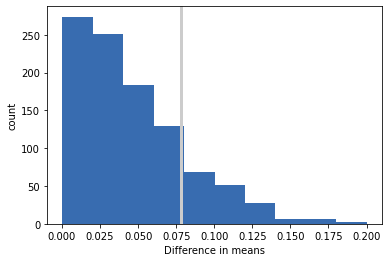

In [52]:
plt.axvline(actual, linewidth=3, color='0.8')
plt.hist(test_stats, color=COLOR5)
plt.xlabel('Difference in means')
plt.ylabel('count')
plt.show()


In [53]:
pvalue = sum(test_stats>=actual)/len(test_stats)
pvalue

0.178

- Probability that test statistic under null hypothesis exceeds the actual value

## Part 2

### Framework

In [61]:
class HypothesisTest(object):
    
    def __init__(self, data):
        """ Initiailizes
        
        data: data in whatever form is relevant
        """
        
        self.data = data
        self.test_stats = None
        self.actual = self.test_statistics(data)
        self.make_model()
        
    def pvalue(self, iters=1000):
        """ Computes distribution of the test statistics
        
        iters: number of iterations
        returns: float p-value
        """
        
        self.test_stats = np.array([self.test_statistics(self.run_model()) for _ in range(iters)])
        count = sum(self.test_stats >= actual)
        return count/iters
    
    
    def plot_hist(self):
        plt.axvline(self.actual, linewidth=3, color='0.8')
        plt.hist(self.test_stats, color=COLOR4)
        plt.xlabel('Test Statistics')
        plt.ylabel('count')
        plt.show()
        
    
    def max_teststat(self):
        """
        Returns the largest test statistics seen during simulations
        """
        return max(self.test_stats)
    
    
    def test_statistics(self, data):
        """ Computes the test statistics
        
        data: data in whatever form is relative_difference_by_female
        """
        
        raise UnimplementedMethodException()
        
        
    def make_model(self):
        """
        Build a model of null hypothesis
        """
        
        pass
    
    def run_model(self):
        """
        Run the model of the null hypothesis
        
        returns: simulated data
        """
        
        raise UnimplementedMethodException()

### DiffMeansPermute

In [62]:
class DiffMeansPermute(HypothesisTest):
    
    def test_statistics(self, data):
        """
        Computes the test statistics
        
        data: data in whatever form is relevant for the diff
        """
        
        grp1, grp2 = data
        test_stat = abs(grp1.mean() - grp2.mean())
        return test_stat
    
    def make_model(self):
        grp1, grp2  = self.data
        self.n, self.m = len(grp1), len(grp2)
        self.pool = np.hstack((grp1, grp2))
        
    
    def run_model(self):
        """
        Run the model of the null hypothesis
        
        returns: simulated data 
        """
        
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [63]:
data = (firsts.prglngth, others.prglngth)

ht = DiffMeansPermute(data)

p_value = ht.pvalue(iters=1000)
p_value, ht.actual, ht.max_teststat()

(0.164, 0.07803726677754952, 0.20456044359674053)

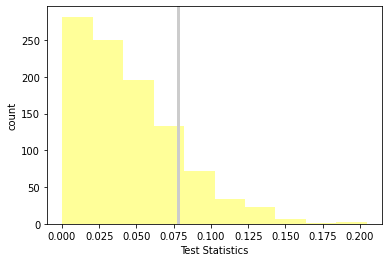

In [64]:
ht.plot_hist()

### DiffStdPermute

In [65]:
class DiffStdPermute(DiffMeansPermute):
    
    def test_statistics(self, data):
        grp1, grp2 = data
        test_stat = abs(grp1.std() - grp2.std())
        return test_stat
    

In [66]:
data = (firsts.prglngth, others.prglngth)

ht = DiffStdPermute(data)

p_value = ht.pvalue(iters=1000)
p_value, ht.actual, ht.max_teststat()

(0.523, 0.17604906422948297, 0.3682700930119429)

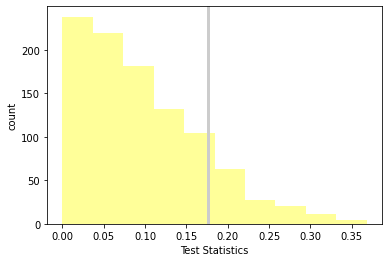

In [67]:
ht.plot_hist()

### Applying on Birth Weights

In [72]:
data = (firsts.totalwgt_lb.dropna(), others.totalwgt_lb.dropna())

ht = DiffMeansPermute(data)

p_value = ht.pvalue(iters=1000)

p_value, ht.actual, ht.max_teststat()

(0.004, 0.12476118453549034, 0.08186367252086946)

In [74]:
data

(0        8.8125
 2        9.1250
 5        8.5625
 8        7.5625
 10       7.8125
           ...  
 13576    6.4375
 13578    6.0000
 13581    6.3750
 13584    6.3750
 13588    6.1875
 Name: totalwgt_lb, Length: 4363, dtype: float64,
 1        7.8750
 3        7.0000
 4        6.1875
 6        9.5625
 7        8.3750
           ...  
 13572    5.8125
 13574    6.1250
 13579    7.0000
 13591    7.5000
 13592    7.5000
 Name: totalwgt_lb, Length: 4675, dtype: float64)